# French given names per year per department
### Autor: Ana Granizo

The dataset is the set of Firstname given in France on a large period of time. 
[given names data set of INSEE](https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2019_csv.zip), we choose this dataset because it is sufficiently large, you can't do the analysis by hand, the structure is simple

## Import the necessary Libraries

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os.path
import urllib.request
import zipfile

## Download Raw Data from the website

In [15]:
data_url="https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2019_csv.zip"
file = "dpt2019_csv.zip"
if not os.path.exists(file):
    urllib.request.urlretrieve(data_url, file)
zipfile = zipfile.ZipFile(file) 
raz_data = pd.read_csv(zipfile.open('dpt2019.csv'))

## Build the Dataframe from file

In [46]:
FirstNames = pd.read_csv(file, delimiter = ";")
FirstNames

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3676677,2,ZYA,2018,59,3
3676678,2,ZYA,XXXX,XX,252
3676679,2,ZYNA,2013,93,3
3676680,2,ZYNA,XXXX,XX,54


Translation in english of variables names:  
sexe -> gender  
preusuel (prénom usuel) -> Firstname  
annais (année de naissance) -> Birth year  
dpt (département) -> department (administrative area unit)  
nombre -> number

## Clean the Data

In order to avoid encountering problems later, when we analize the data, we delete the rows where we have empty values and the rows where we have "XXXX" in the year column and "XX" in the department colums.

In [47]:
FirstNames = FirstNames.dropna().copy()
FirstNames = FirstNames.drop(FirstNames[FirstNames['annais']=="XXXX"].index)
FirstNames = FirstNames.drop(FirstNames[FirstNames['dpt']=="XX"].index)
print(FirstNames)

         sexe        preusuel annais  dpt  nombre
0           1  _PRENOMS_RARES   1900   02       7
1           1  _PRENOMS_RARES   1900   04       9
2           1  _PRENOMS_RARES   1900   05       8
3           1  _PRENOMS_RARES   1900   06      23
4           1  _PRENOMS_RARES   1900   07       9
...       ...             ...    ...  ...     ...
3676674     2             ZYA   2013   44       4
3676675     2             ZYA   2013   59       3
3676676     2             ZYA   2017  974       3
3676677     2             ZYA   2018   59       3
3676679     2            ZYNA   2013   93       3

[3640237 rows x 5 columns]


We check if there is a value in the gender column different to 1 and 2. To check if this database only consider 2 genders or if there are some mistaken values.

In [92]:
print(FirstNames[(FirstNames['sexe']!=1) & (FirstNames['sexe']!=2)])

Empty DataFrame
Columns: [sexe, preusuel, annais, dpt, nombre]
Index: []


We want to know if the values of the column years is in integers or text so we try to print it considering as if they are numbers.

In [97]:
print(FirstNames[(FirstNames['annais']==1987)])

Empty DataFrame
Columns: [sexe, preusuel, annais, dpt, nombre]
Index: []


As we can see that there are no data, it means that the values are string. So we need to change them to integers. And now we can see that we print all the rows where the year is 1987.

In [98]:
FirstNames['annais'] = FirstNames['annais'].astype(int)
print(FirstNames[(FirstNames['annais']==1987)])

         sexe        preusuel  annais dpt  nombre
7531        1  _PRENOMS_RARES    1987  01      30
7532        1  _PRENOMS_RARES    1987  02      30
7533        1  _PRENOMS_RARES    1987  03      17
7534        1  _PRENOMS_RARES    1987  04       7
7535        1  _PRENOMS_RARES    1987  05       7
...       ...             ...     ...  ..     ...
3675980     2           ZOHRA    1987  77       3
3675981     2           ZOHRA    1987  78       5
3675982     2           ZOHRA    1987  84       3
3675983     2           ZOHRA    1987  92       3
3675984     2           ZOHRA    1987  93       4

[39253 rows x 5 columns]


## Now let's analize de data

### 1. Choose a firstname and analyse its frequency along time
The first name we choose is: "Kevin". We can see that its occurrences begin to rise at the end of the 70s, reaching a maximum peak with more than 800 occurrences around the year 1990. Then it begins to decrease uniformly until below 100 occurrences around the year 2000.

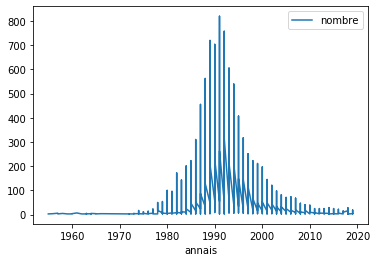

In [109]:
name = FirstNames.loc[FirstNames["preusuel"]=="KEVIN"]
name.plot(x='annais', y='nombre')

### Compare several firstnames frequency
We compare the names Kevin, Margaux, Hervé, Coralie. And we can see that the name Kevin is the one that has biggest pick of ocurrences with 800, followed by Hervé with arround 600. For Margaux and Coralie there are only a little pased the 150. 

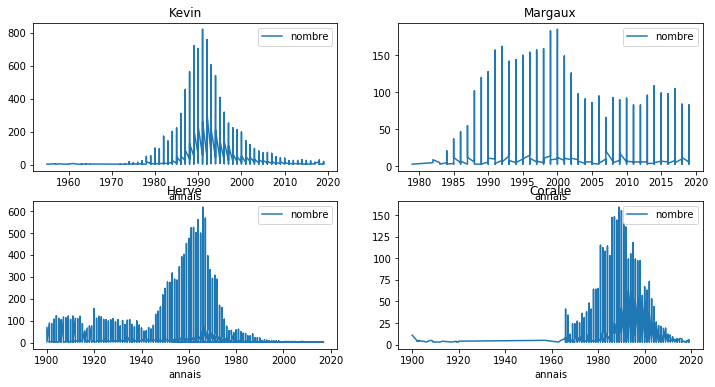

In [127]:
name2 = FirstNames.loc[FirstNames["preusuel"]=="MARGAUX"]
name3 = FirstNames.loc[FirstNames["preusuel"]=="HERVÉ"]
name4 = FirstNames.loc[FirstNames["preusuel"]=="CORALIE"]

fig, (axes) = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
axes[0, 0].set_title("Kevin")
axes[0, 1].set_title("Margaux")
axes[1, 0].set_title("Hervé")
axes[1, 1].set_title("Coralie")
name.plot(x='annais', y='nombre', ax = axes[0,0],subplots=True)
name2.plot(x='annais', y='nombre',ax = axes[0,1],subplots=True)
name3.plot(x='annais', y='nombre',ax = axes[1,0],subplots=True)
name4.plot(x='annais', y='nombre',ax = axes[1,1],subplots=True)
plt.show()

But this only can tell us that some names were more "popular" at the same moment, for instance in a given year or period of time. We now are gonig to add all the ocurrences of each name over the years to find out which name has been most used in general.

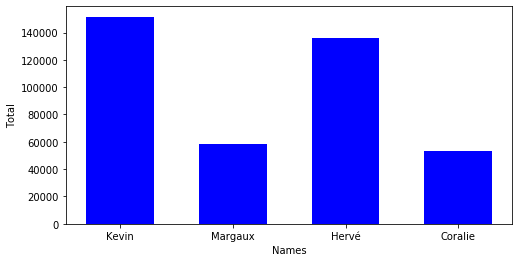

In [135]:
total_Kevin = name['nombre'].sum()
total_Margaux = name2['nombre'].sum()
total_Hervé = name3['nombre'].sum()
total_Coralie = name4['nombre'].sum()
names=("Kevin", "Margaux", "Hervé", "Coralie")
total = (total_Kevin,total_Margaux,total_Hervé,total_Coralie)
fig = plt.figure(figsize = (8, 4)) 
plt.bar(names, total, color ='blue', width = 0.6) 
  
plt.xlabel("Names") 
plt.ylabel("Total") 
plt.show() 

As the plot shows, Kevin is still the name with more ocurrences with more than 140000 ocurrences, followed by Hervé. And at last Margaux and Coralie. 

### 2. Establish by gender the most given firstname by year
In order to know what are the most given names per year and per gender, we need first to separate the data by genre. Then group all the names in each year and select the max value of the colum number per group. Which will give us the most given names for each year.

In [226]:
gender1 = FirstNames.loc[FirstNames["sexe"]==1]
gender2 = FirstNames.loc[FirstNames["sexe"]==2]

index1 = gender1.groupby(by=["annais"])['nombre'].transform(max) == gender1['nombre']
gender1[index1].sort_values('annais')

,sexe,preusuel,annais,dpt,nombre
113050,1,ANDRÉ,1900,75,1057
1081054,1,MARCEL,1901,75,1082
605883,1,GEORGES,1902,75,1098
113330,1,ANDRÉ,1903,75,1237
113423,1,ANDRÉ,1904,75,1305
...,...,...,...,...,...
10377,1,_PRENOMS_RARES,2015,93,1597
10476,1,_PRENOMS_RARES,2016,93,1565
10557,1,_PRENOMS_RARES,2017,75,1640
10674,1,_PRENOMS_RARES,2018,93,1555


In [227]:
index2 = gender2.groupby(by=["annais"])['nombre'].transform(max) == gender2['nombre']
gender2[index2].sort_values('annais')

,sexe,preusuel,annais,dpt,nombre
3005994,2,MARIE,1900,29,2519
3006088,2,MARIE,1901,29,2688
3006182,2,MARIE,1902,29,2772
3006276,2,MARIE,1903,29,2773
3006370,2,MARIE,1904,29,2738
...,...,...,...,...,...
1715166,2,_PRENOMS_RARES,2015,93,1688
1715265,2,_PRENOMS_RARES,2016,93,1634
1715369,2,_PRENOMS_RARES,2017,973,1829
1715468,2,_PRENOMS_RARES,2018,973,1846


### Analyse the evolution of the most frequent firstname
We can see in the plot the evolution of some of the names more frequents.

As we can see, André, Marcel and Georges were really frequent at the beginning of the century. And it lowered its frequency around the 60s. Unlike Marie, which in the 60s is its highest peak of occurrences.

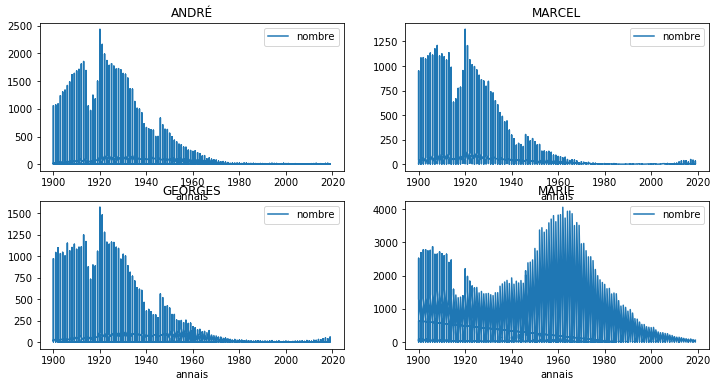

In [233]:
name1 = FirstNames.loc[FirstNames["preusuel"]=="ANDRÉ"]
name2 = FirstNames.loc[FirstNames["preusuel"]=="MARCEL"]
name3 = FirstNames.loc[FirstNames["preusuel"]=="GEORGES"]
name4 = FirstNames.loc[FirstNames["preusuel"]=="MARIE"]

fig, (axes) = plt.subplots(nrows=2,ncols=2,figsize=(12,6))
axes[0, 0].set_title("ANDRÉ")
axes[0, 1].set_title("MARCEL")
axes[1, 0].set_title("GEORGES")
axes[1, 1].set_title("MARIE")
name1.plot(x='annais', y='nombre',ax = axes[0,0],subplots=True)
name2.plot(x='annais', y='nombre',ax = axes[0,1],subplots=True)
name3.plot(x='annais', y='nombre',ax = axes[1,0],subplots=True)
name4.plot(x='annais', y='nombre',ax = axes[1,1],subplots=True)
plt.show()